In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
from google.colab import files
upload = files.upload()

Saving surveyResponses2.csv to surveyResponses2.csv


In [3]:
responses = pd.read_csv("surveyResponses2.csv")
df = pd.DataFrame(responses)

In [4]:
df.head()

,Timestamp,Gender,What is your CGPA?,What is your Secondary education certificate?,What is your total grades according to Egyptian Thanaweya Amma grading system?,Optional: specify your total grades if you are not a Thanaweya Amma certificate holder as written in your certificate,How did you attend your private courses through senior year (Online | On-ground) ?,If there a chance to improve your previous grades what would you choose (Online | On-ground)?
0,3/4/2024 21:04:32,Male,2.58,Egyptian Thanaweya Amma,81,NaN,Online only,Online mostly
1,3/4/2024 21:15:06,Female,2.40,Egyptian Thanaweya Amma,70%,NaN,50% On-ground and 50 % Online,On-ground mostly
2,3/4/2024 21:21:18,Male,3.34,Egyptian Thanaweya Amma,86.10%,NaN,Online mostly,50% On-ground and 50 % Online
3,3/4/2024 21:31:25,Male,2.39,IGCSE,84.33%,NaN,No private courses,On-ground mostly
4,3/4/2024 22:01:26,Female,2.35,Egyptian Thanaweya Amma,71.20%,NaN,50% On-ground and 50 % Online,On-ground mostly


In [5]:
def convert_to_numeric(grade):
    return float(grade.strip('%')) if '%' in str(grade) else float(grade)
def convert_to_percent(grade):
    return (grade / 410)*100 if grade > 105 else grade
gradesQ = "What is your total grades according to Egyptian Thanaweya Amma grading system?"
attendanceQ = "How did you attend your private courses through senior year  (Online | On-ground) ? "

In [6]:
df[gradesQ] = df[gradesQ].apply(convert_to_numeric)
df[gradesQ] = df[gradesQ].apply(convert_to_percent)

In [7]:
df

,Timestamp,Gender,What is your CGPA?,What is your Secondary education certificate?,What is your total grades according to Egyptian Thanaweya Amma grading system?,Optional: specify your total grades if you are not a Thanaweya Amma certificate holder as written in your certificate,How did you attend your private courses through senior year (Online | On-ground) ?,If there a chance to improve your previous grades what would you choose (Online | On-ground)?
0,3/4/2024 21:04:32,Male,2.58,Egyptian Thanaweya Amma,81.000000,NaN,Online only,Online mostly
1,3/4/2024 21:15:06,Female,2.40,Egyptian Thanaweya Amma,70.000000,NaN,50% On-ground and 50 % Online,On-ground mostly
2,3/4/2024 21:21:18,Male,3.34,Egyptian Thanaweya Amma,86.100000,NaN,Online mostly,50% On-ground and 50 % Online
3,3/4/2024 21:31:25,Male,2.39,IGCSE,84.330000,NaN,No private courses,On-ground mostly
4,3/4/2024 22:01:26,Female,2.35,Egyptian Thanaweya Amma,71.200000,NaN,50% On-ground and 50 % Online,On-ground mostly
5,3/4/2024 22:01:44,Female,2.80,American Diploma,103.000000,CGPA 4.0,No private courses,On-ground mostly
6,3/4/2024 22:13:04,Male,2.24,Outside thanawya amma,95.000000,NaN,No private courses,On-ground mostly
7,3/4/2024 22:22:20,Male,4.00,IGCSE,98.300000,NaN,On-ground only,On-ground only
8,3/4/2024 23:03:58,Male,2.40,IGCSE,90.000000,NaN,On-ground mostly,On-ground mostly
9,3/4/2024 23:17:08,Male,2.13,American Diploma,89.000000,NaN,50% On-ground and 50 % Online,On-ground mostly


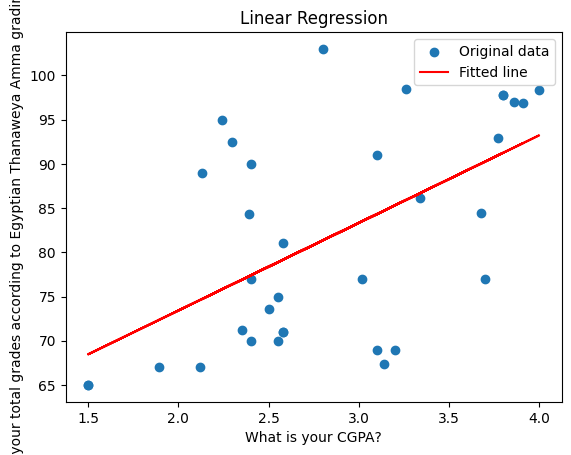

In [8]:
from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(df['What is your CGPA?'], df[gradesQ])
plt.scatter(df['What is your CGPA?'], df[gradesQ], label='Original data')
plt.plot(df['What is your CGPA?'], intercept + slope * df['What is your CGPA?'], color='red', label='Fitted line')
plt.xlabel('What is your CGPA?')
plt.ylabel(gradesQ)
plt.legend()
plt.title('Linear Regression')
plt.show()


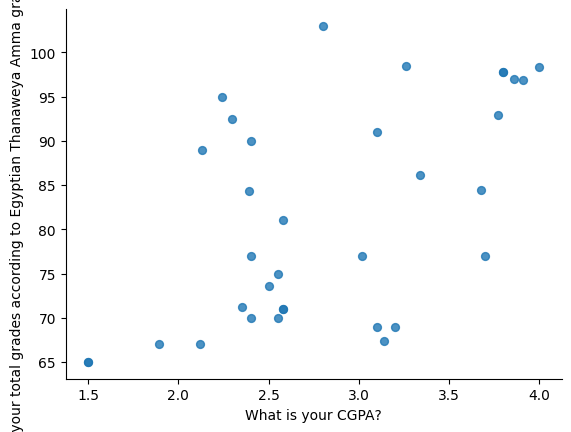

In [9]:
# @title What is your CGPA? vs What is your total grades according to Egyptian Thanaweya Amma grading system?

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='What is your CGPA?', y='What is your total grades according to Egyptian Thanaweya Amma grading system?', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

<ipython-input-10-94754e06d857>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x=gradesQ, y='How did you attend your private courses through senior year  (Online | On-ground) ? ', inner='stick', palette='Dark2')


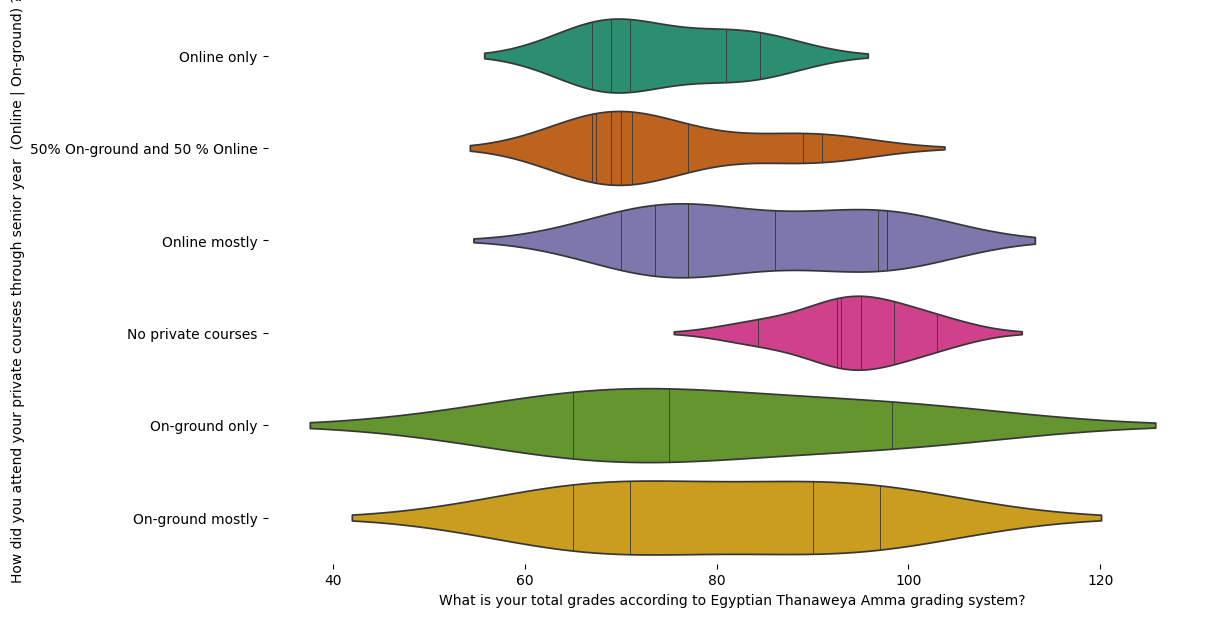

In [10]:
# @title How did you attend your private courses through senior year  (Online | On-ground) ?  vs What is your total grades according to Egyptian Thanaweya Amma grading system?

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['How did you attend your private courses through senior year  (Online | On-ground) ? '].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x=gradesQ, y='How did you attend your private courses through senior year  (Online | On-ground) ? ', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<ipython-input-11-cb91b64bdd95>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x='What is your CGPA?', y='How did you attend your private courses through senior year  (Online | On-ground) ? ', inner='stick', palette='Dark2')


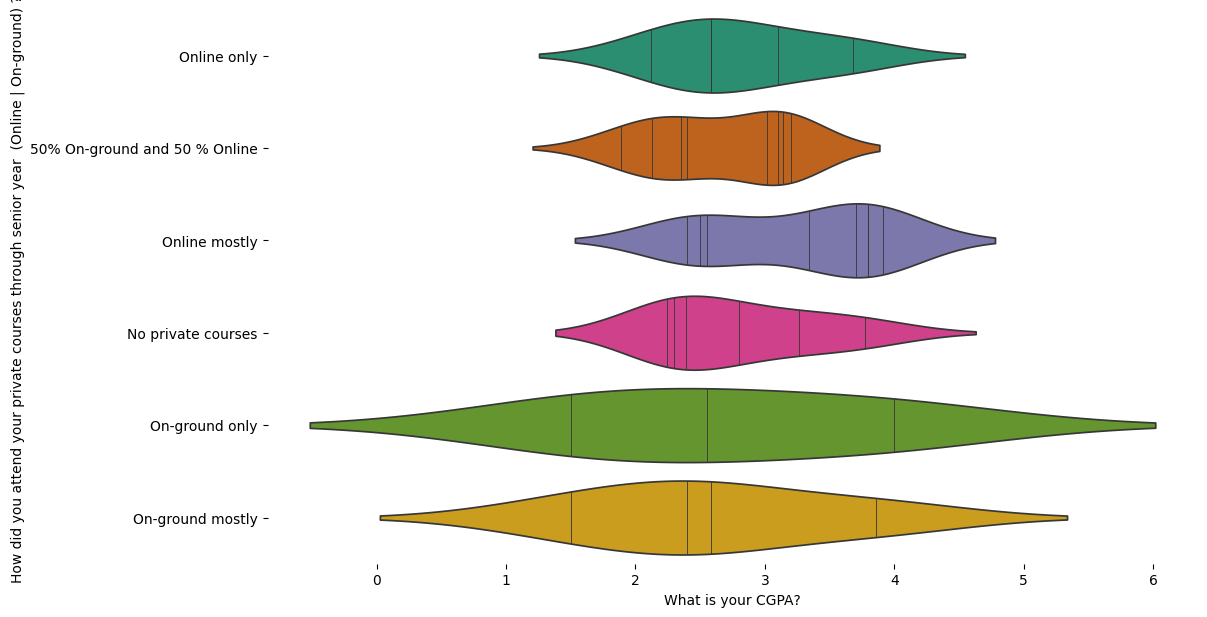

In [11]:
# @title How did you attend your private courses through senior year  (Online | On-ground) ?  vs What is your CGPA?

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['How did you attend your private courses through senior year  (Online | On-ground) ? '].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='What is your CGPA?', y='How did you attend your private courses through senior year  (Online | On-ground) ? ', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

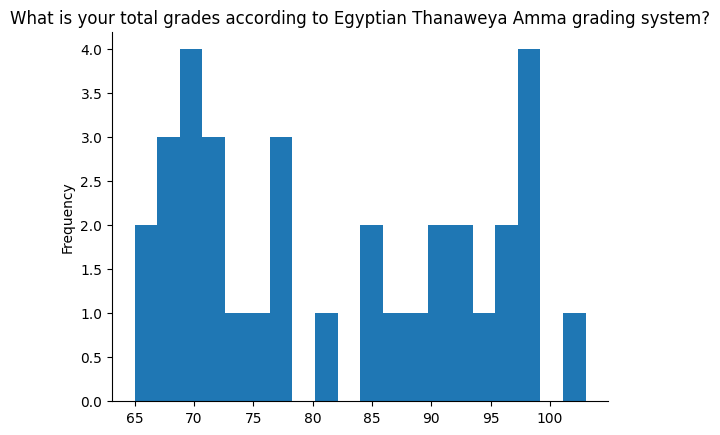

In [12]:
# @title What is your total grades according to Egyptian Thanaweya Amma grading system?

from matplotlib import pyplot as plt
df['What is your total grades according to Egyptian Thanaweya Amma grading system?'].plot(kind='hist', bins=20, title='What is your total grades according to Egyptian Thanaweya Amma grading system?')
plt.gca().spines[['top', 'right',]].set_visible(False)

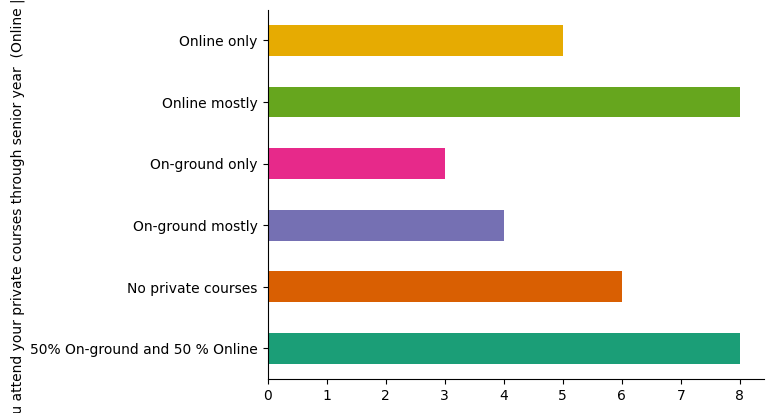

In [13]:
# @title How did you attend your private courses through senior year  (Online | On-ground) ?

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('How did you attend your private courses through senior year  (Online | On-ground) ? ').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [14]:
df.drop('Optional: specify your total grades if you are not a Thanaweya Amma certificate holder as written in your certificate', axis= 1, inplace = True)
df.drop('Timestamp', axis= 1, inplace = True)

In [15]:
mean_grades = df.groupby("How did you attend your private courses through senior year  (Online | On-ground) ? ")[gradesQ].mean()
mean_grades_df = pd.DataFrame(mean_grades)
mean_grades_df

,What is your total grades according to Egyptian Thanaweya Amma grading system?
How did you attend your private courses through senior year (Online | On-ground) ?,
50% On-ground and 50 % Online,75.200000
No private courses,94.376138
On-ground mostly,80.757500
On-ground only,79.433333
Online mostly,84.517378
Online only,74.500000


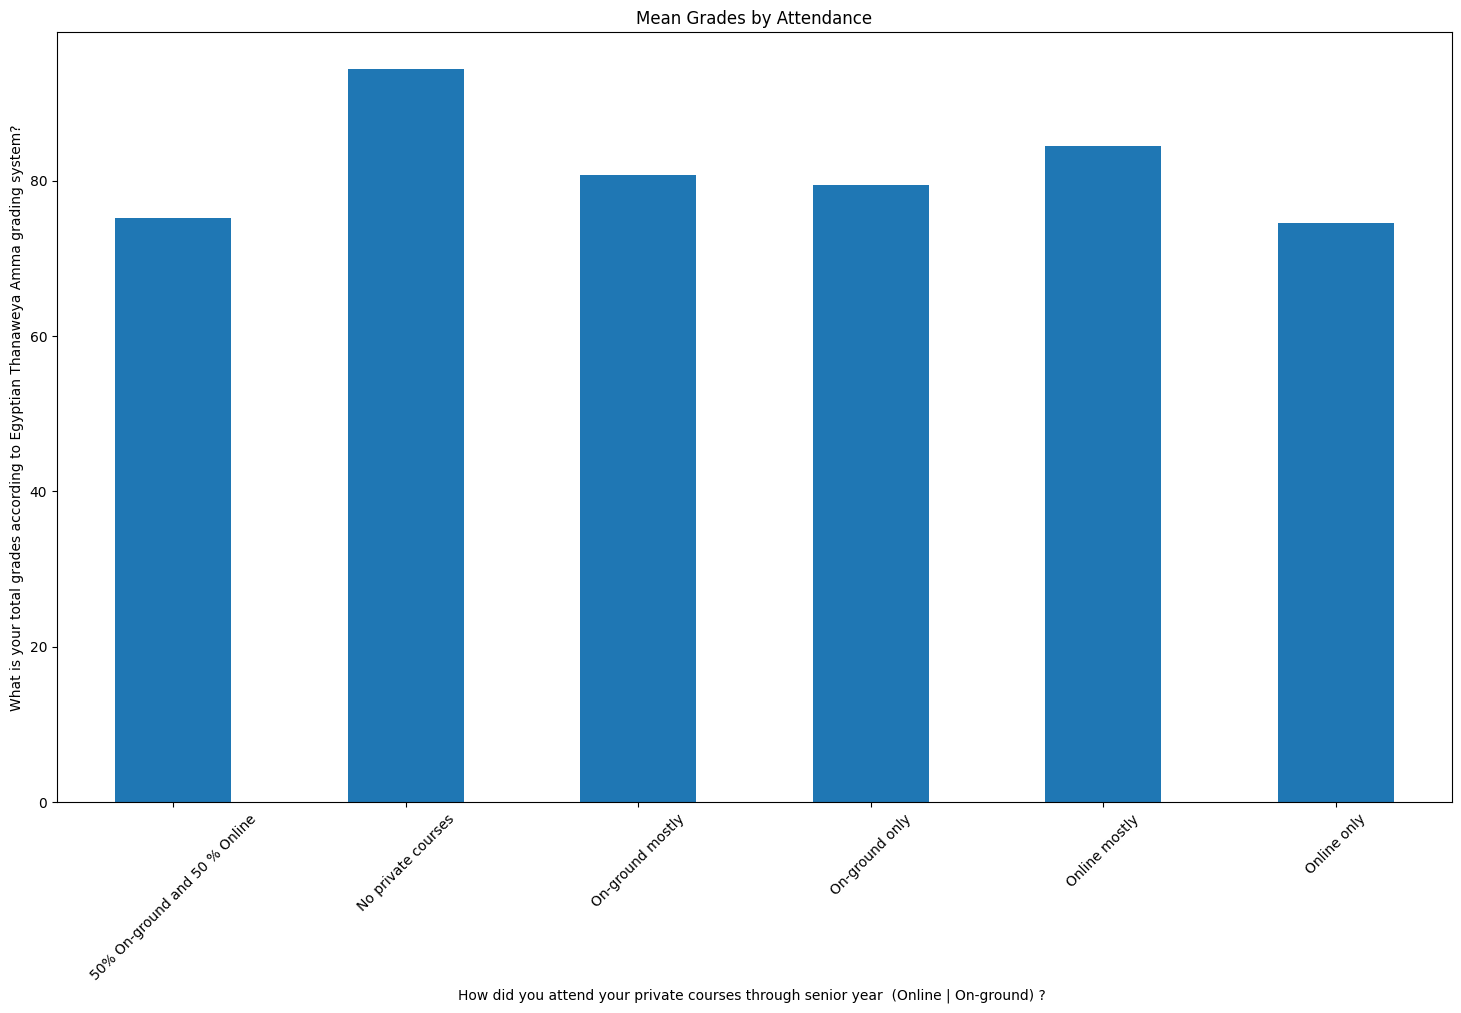

In [16]:
mean_grades.plot(kind='bar', figsize = (18, 10))
plt.title('Mean Grades by Attendance')
plt.xlabel('How did you attend your private courses through senior year  (Online | On-ground) ? ')
plt.ylabel('What is your total grades according to Egyptian Thanaweya Amma grading system?')
plt.xticks(rotation=45)
plt.show()

In [26]:
mean_grades_all = df['What is your total grades according to Egyptian Thanaweya Amma grading system?'].mean()
mode_grades_all = df['What is your total grades according to Egyptian Thanaweya Amma grading system?'].mode()
std_grades_all = df['What is your total grades according to Egyptian Thanaweya Amma grading system?'].std()
print(mean_grades_all, mode_grades_all, std_grades_all)

81.70076040172165 0    77.0
Name: What is your total grades according to Egyptian Thanaweya Amma grading system?, dtype: float64 12.264492267053614


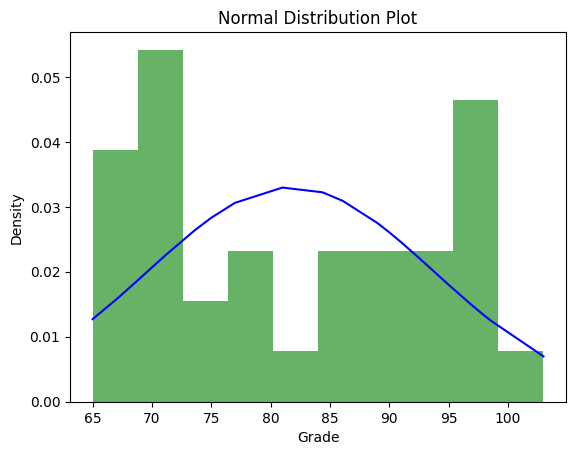

In [29]:
column_name = 'What is your total grades according to Egyptian Thanaweya Amma grading system?'
column_data = df[column_name]

# Calculate mean and standard deviation
mean = np.mean(column_data)
std_dev = np.std(column_data)

# Fit a normal distribution to the data
normal_distribution = norm.pdf(sorted(column_data), mean, std_dev)

# Plot the histogram of the data
plt.hist(column_data, bins=10, density=True, alpha=0.6, color='g')

# Plot the normal distribution curve
plt.plot(sorted(column_data), normal_distribution, color='blue')

# Add labels and title
plt.xlabel('Grade')
plt.ylabel('Density')
plt.title('Normal Distribution Plot')

# Show plot
plt.show()

In [18]:
regret = []
for i in range(len(df)):
  if df['How did you attend your private courses through senior year  (Online | On-ground) ? '][i] == df['If there a chance to improve your previous grades what would you choose (Online | On-ground)?'][i]:
    regret.append(False)
  else:
    regret.append(True)
rf = pd.DataFrame(regret, columns= ['Did you regret your chosen way of attending classes?'])
rf.tail()

,Did you regret your chosen way of attending classes?
29,True
30,True
31,True
32,False
33,True


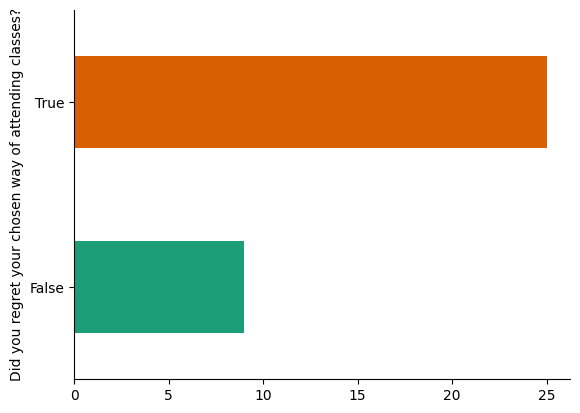

In [19]:
# @title Did you regret your chosen way of attending classes?

from matplotlib import pyplot as plt
import seaborn as sns
rf.groupby('Did you regret your chosen way of attending classes?').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

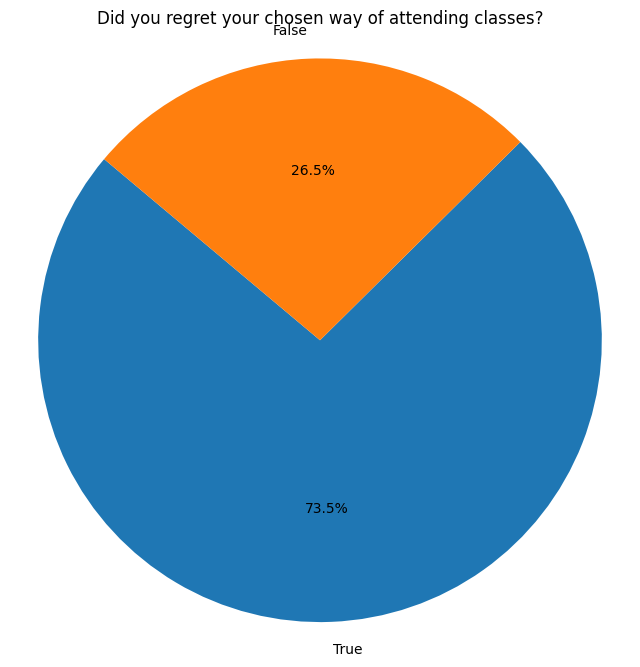

In [20]:
value_counts = rf['Did you regret your chosen way of attending classes?'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Did you regret your chosen way of attending classes?')
plt.axis('equal')
plt.show()

<ipython-input-21-715a0cb35161>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(column_data, shade=True)


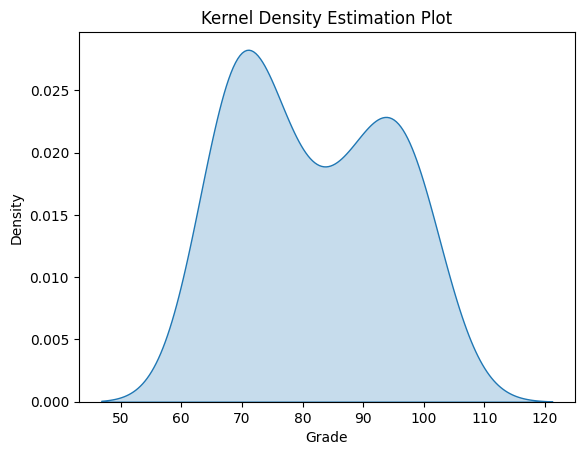

In [21]:
# Extract the column containing the data
column_name = 'What is your total grades according to Egyptian Thanaweya Amma grading system?'
column_data = df[column_name]

# Create KDE plot using Seaborn
sns.kdeplot(column_data, shade=True)

# Add labels and title
plt.xlabel('Grade')
plt.ylabel('Density')
plt.title('Kernel Density Estimation Plot')

# Show plot
plt.show()

In [22]:
df

,Gender,What is your CGPA?,What is your Secondary education certificate?,What is your total grades according to Egyptian Thanaweya Amma grading system?,How did you attend your private courses through senior year (Online | On-ground) ?,If there a chance to improve your previous grades what would you choose (Online | On-ground)?
0,Male,2.58,Egyptian Thanaweya Amma,81.000000,Online only,Online mostly
1,Female,2.40,Egyptian Thanaweya Amma,70.000000,50% On-ground and 50 % Online,On-ground mostly
2,Male,3.34,Egyptian Thanaweya Amma,86.100000,Online mostly,50% On-ground and 50 % Online
3,Male,2.39,IGCSE,84.330000,No private courses,On-ground mostly
4,Female,2.35,Egyptian Thanaweya Amma,71.200000,50% On-ground and 50 % Online,On-ground mostly
5,Female,2.80,American Diploma,103.000000,No private courses,On-ground mostly
6,Male,2.24,Outside thanawya amma,95.000000,No private courses,On-ground mostly
7,Male,4.00,IGCSE,98.300000,On-ground only,On-ground only
8,Male,2.40,IGCSE,90.000000,On-ground mostly,On-ground mostly
9,Male,2.13,American Diploma,89.000000,50% On-ground and 50 % Online,On-ground mostly


In [30]:
print(df)

    Gender  What is your CGPA? What is your Secondary education certificate?  \
0     Male                2.58                       Egyptian Thanaweya Amma   
1   Female                2.40                       Egyptian Thanaweya Amma   
2     Male                3.34                       Egyptian Thanaweya Amma   
3     Male                2.39                                         IGCSE   
4   Female                2.35                       Egyptian Thanaweya Amma   
5   Female                2.80                              American Diploma   
6     Male                2.24                         Outside thanawya amma   
7     Male                4.00                                         IGCSE   
8     Male                2.40                                         IGCSE   
9     Male                2.13                              American Diploma   
10  Female                3.70                       Egyptian Thanaweya Amma   
11  Female                1.89          

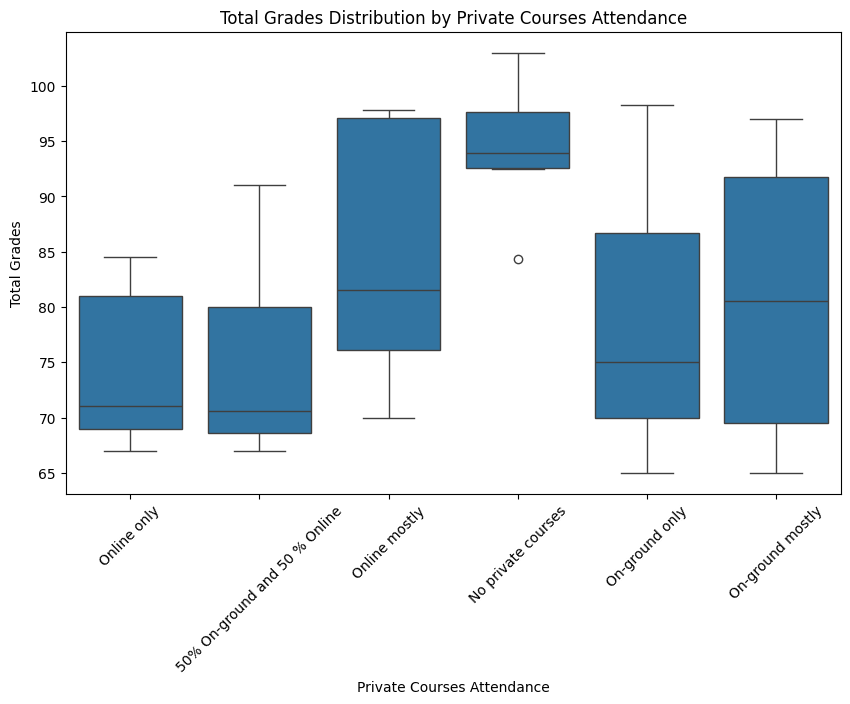

In [33]:
# Create a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=attendanceQ, y=gradesQ, data=df)
plt.title('Total Grades Distribution by Private Courses Attendance')
plt.xticks(rotation=45)
plt.xlabel('Private Courses Attendance')
plt.ylabel('Total Grades')
plt.show()

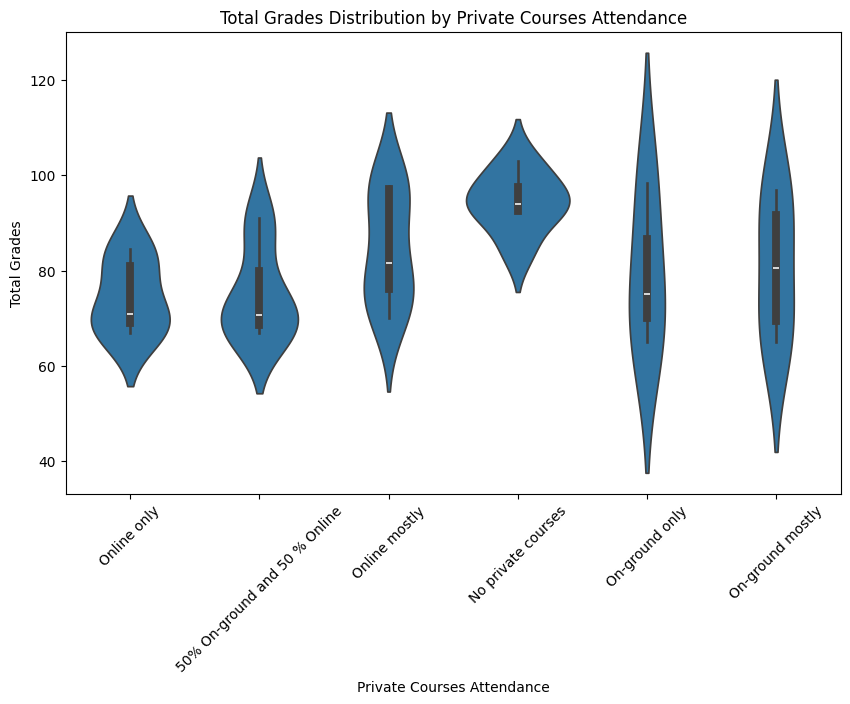

In [34]:
# Create a violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x=attendanceQ, y=gradesQ, data=df)
plt.title('Total Grades Distribution by Private Courses Attendance')
plt.xlabel('Private Courses Attendance')
plt.ylabel('Total Grades')
plt.xticks(rotation=45)
plt.show()

<ipython-input-35-cdb1964b39af>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


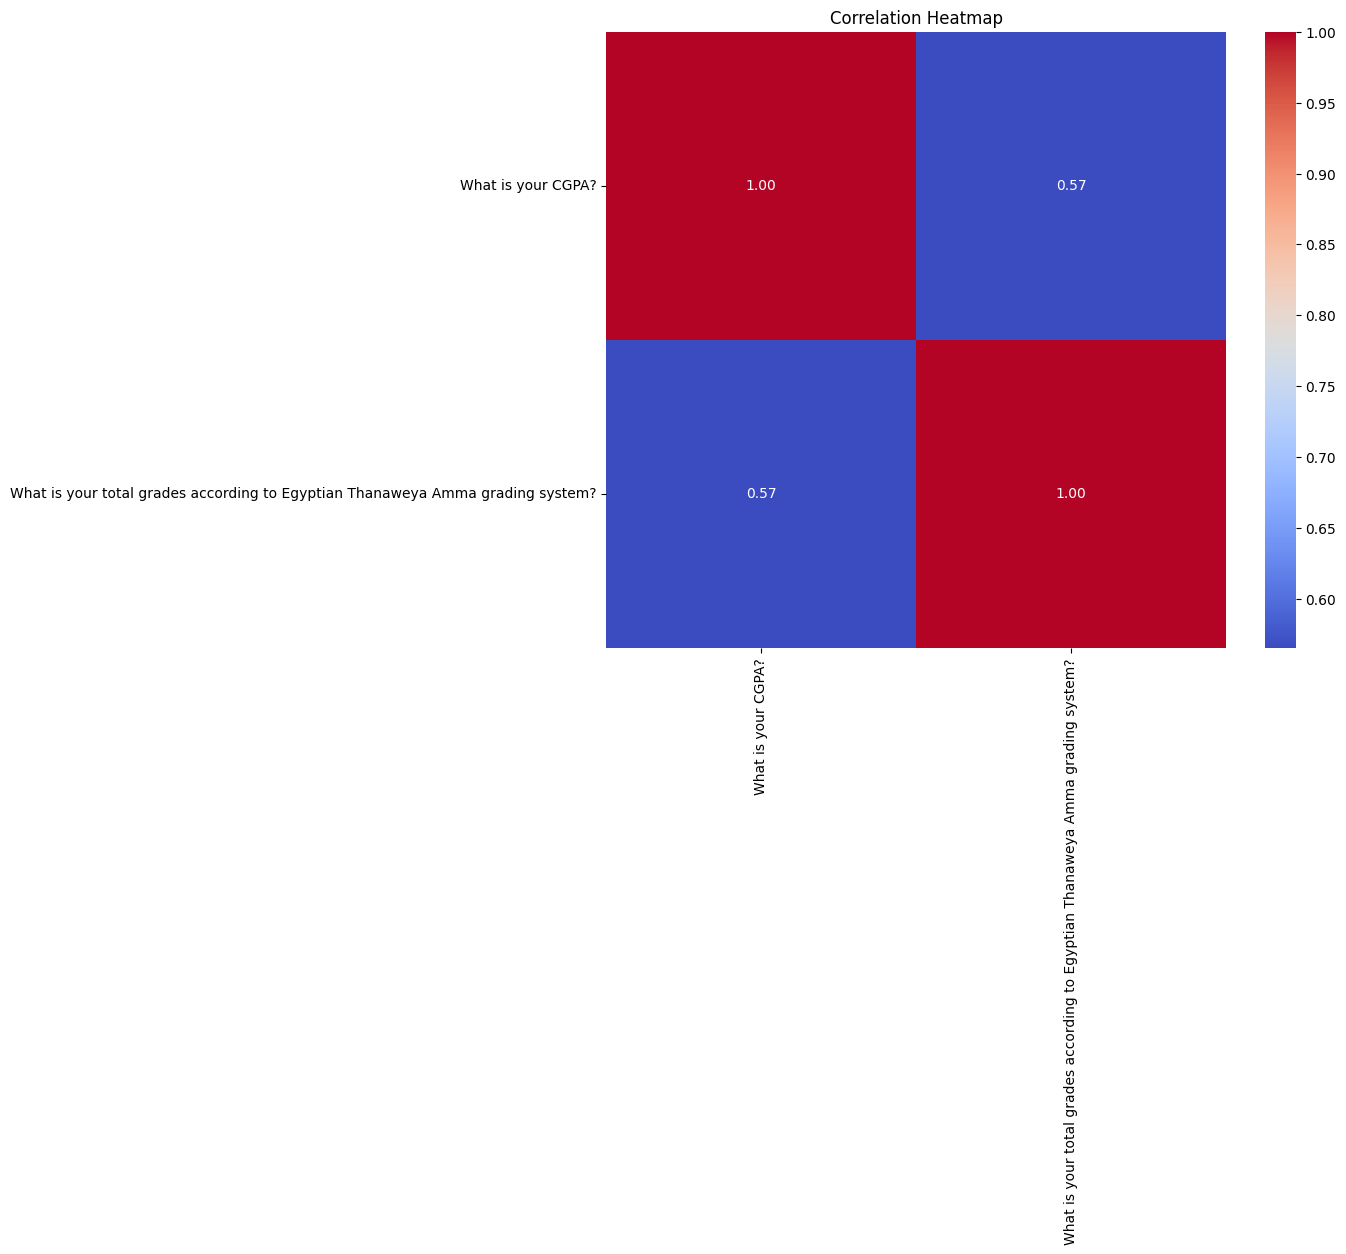

In [35]:
corr_matrix = df.corr()

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

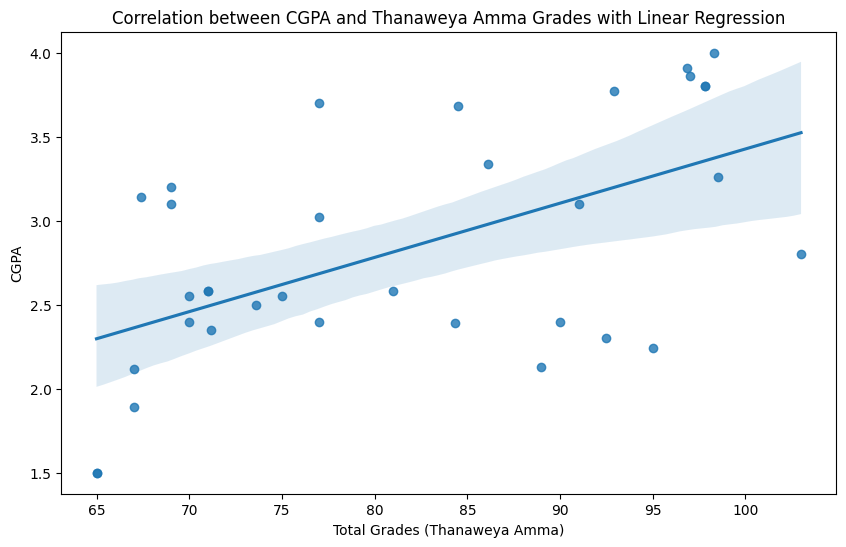

In [37]:
# Create a scatter plot with linear regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='What is your total grades according to Egyptian Thanaweya Amma grading system?',
            y='What is your CGPA?', data=df)
plt.title('Correlation between CGPA and Thanaweya Amma Grades with Linear Regression')
plt.xlabel('Total Grades (Thanaweya Amma)')
plt.ylabel('CGPA')
plt.show()

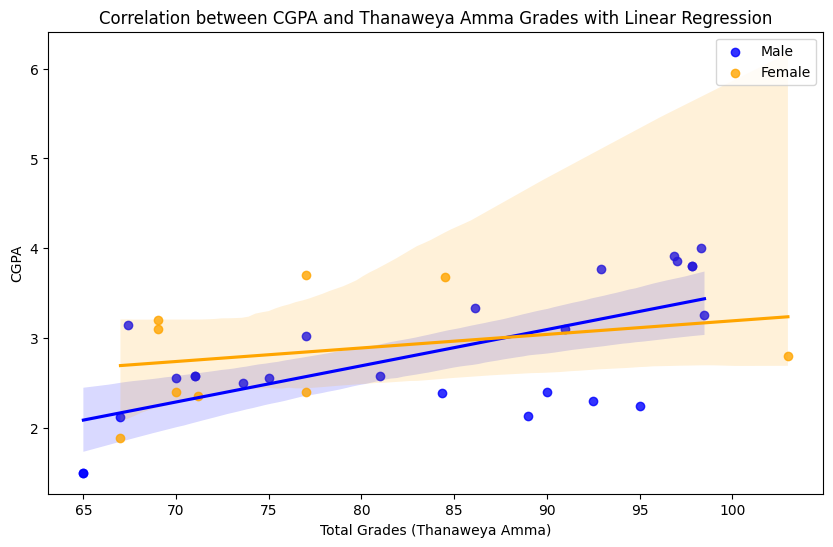

In [38]:
# Create a scatter plot with linear regression line
plt.figure(figsize=(10, 6))

# Plot male data points in blue
sns.regplot(x='What is your total grades according to Egyptian Thanaweya Amma grading system?',
            y='What is your CGPA?', data=df[df['Gender'] == 'Male'], color='blue', label='Male')

# Plot female data points in orange
sns.regplot(x='What is your total grades according to Egyptian Thanaweya Amma grading system?',
            y='What is your CGPA?', data=df[df['Gender'] == 'Female'], color='orange', label='Female')

plt.title('Correlation between CGPA and Thanaweya Amma Grades with Linear Regression')
plt.xlabel('Total Grades (Thanaweya Amma)')
plt.ylabel('CGPA')
plt.legend()
plt.show()